## RSA Tutorial

In [1]:
repl.pprinter() = repl.pprinter().copy(defaultHeight = 0)
import $ivy.`com.markblokpoel::lanag-core:0.3.2`
interp.load.cp(new java.net.URL("https://github.com/markblokpoel/lanag-ambiguityhelps/blob/jupyternotebooks/binaries/lanag-ambiguityhelps-0.1.jar?raw=true"))
import com.markblokpoel.lanag.rsa.Lexicon
import com.markblokpoel.lanag.core.ReferentialIntention

import $ivy.$                                   

import com.markblokpoel.lanag.rsa.Lexicon

import com.markblokpoel.lanag.core.ReferentialIntention

In [2]:
import com.markblokpoel.lanag.ambiguityhelps.{RSA1ShotAgent, RSA1ShotInteraction}

import com.markblokpoel.lanag.ambiguityhelps.{RSA1ShotAgent, RSA1ShotInteraction}

In the Rational Speech Act model, an agent’s lexicon is defined by a (possibly) graded mapping between a set of signals and a set of referents. This mapping is encoded in a matrix, where each column represents a referent, and each row represents a signal. An agent is defined by its matrix and its order of pragmatic inference. The snippet below illustrates how a zero order agent can be defined and we can print the agent to view its lexicon. 

In [3]:
val map = Vector[Vector[Double]](
  Vector(1,1,0),
  Vector(0,1,0),
  Vector(0,1,1)
)

val lexicon = Lexicon(map)
val order = 0
val smith = new RSA1ShotAgent(lexicon, order)

println(smith)

Agent with order 0
1.0	1.0	0.0	
0.0	1.0	0.0	
0.0	1.0	1.0	



......
......
......
......

To get the agent to engage its pragmatic reasoning capacity, we need to tell the simulation framework if the agent is a speaker or a listener. This is done by calling the function .asSpeaker or .asListener to return the agent as a speaker or listener. It will internally perform pragmatic inference (based on RSA) at the defined order to compute a conditional probability mapping. We can view that conditional probability mapping by printing it. Play around with the map and the order to see how this changes the conditional probability mapping. For example, try setting order to 1 and then 2 or change the agent’s lexicon.

In [4]:


val map = Vector[Vector[Double]](
  Vector(1,1,0),
  Vector(0,1,0),
  Vector(0,1,1)
)
val lexicon = Lexicon(map)
val order = 0
val smith = new RSA1ShotAgent(lexicon, order)

val smithTheSpeaker = smith.asSpeaker

println("\nSmith's zero order lexicon:\n" + smithTheSpeaker.inferredLexicon)



Smith's zero order lexicon:
1.0	0.3333333333333333	0.0	
0.0	0.3333333333333333	0.0	
0.0	0.3333333333333333	1.0	



......
......
......
......
......

We can create a second agent called neo using the same lexicon as we used to construct smith. If we inspect neo’s conditional probability mapping as a listener, we can observe that it is different from smith’s as a speaker. This is because as a speaker, smith computes probability distributions per referent over all signals. As a listener, neo computes the other perspective, namely, probability distributions per signal over all referents.

In [5]:
val map = Vector[Vector[Double]](
  Vector(1,1,0),
  Vector(0,1,0),
  Vector(0,1,1)
)
val lexicon = Lexicon(map)
val order = 0
val smith = new RSA1ShotAgent(lexicon, order)

val smithTheSpeaker = smith.asSpeaker

println("\nSmith's zero order lexicon:\n" + smithTheSpeaker.inferredLexicon)

val neoTheListener = new RSA1ShotAgent(lexicon, order).asListener

println("\nNeo's zero order lexicon:\n" + neoTheListener.inferredLexicon)


Smith's zero order lexicon:
1.0	0.3333333333333333	0.0	
0.0	0.3333333333333333	0.0	
0.0	0.3333333333333333	1.0	


Neo's zero order lexicon:
0.5	0.5	0.0	
0.0	1.0	0.0	
0.0	0.5	0.5	



......
......
......
......
......
......

Let’s have smith communicate something. We give it the intention to communicate referent 0 (represented by the first column). There are a few interesting things we can experiment with here:

1. What signal has the highest probability given that intention?

2. If you run the example multiple times, does the outcome change?

3. Change smith’s intention to 1 (the middle column) and check the most likely signal smith produces. When you run this multiple times, does it change?

4. As a zero order agent, smith cannot reason about the ambiguity in his lexicon and hence doesn’t care which signal it selects. Try setting the order to 1 and observe how both smith and neo’s mappings change (because they are now engaging in higher order pragmatic inference).

5. Run the simulation multiple times. Now we can observe that smith consistently selects signal 1 because it is least ambiguous. This is because signal 0 is best interpreted by a listener to refer to referent 0 and signal 2 to refer to referent 2. Smith is reasoning through neo’s perspective.

In [6]:
val map = Vector[Vector[Double]](
  Vector(1,1,0),
  Vector(0,1,0),
  Vector(0,1,1)
)
val lexicon = Lexicon(map)
val order = 0
val smith = new RSA1ShotAgent(lexicon, order)

val smithTheSpeaker = smith.asSpeaker

println("\nSmith's zero order lexicon:\n" + smithTheSpeaker.inferredLexicon)

val neoTheListener = new RSA1ShotAgent(lexicon, order).asListener

println("\nNeo's zero order lexicon:\n" + neoTheListener.inferredLexicon)



val intention = 0
println("\nSmith wants to communicate referent " + intention)

val int = new ReferentialIntention(Option(intention))

val mostProbableSignal = smithTheSpeaker.produceSignal(int)._1.content.get
println("Smith computes that signal " + mostProbableSignal + " is most likely to succeed.")


Smith's zero order lexicon:
1.0	0.3333333333333333	0.0	
0.0	0.3333333333333333	0.0	
0.0	0.3333333333333333	1.0	


Neo's zero order lexicon:
0.5	0.5	0.0	
0.0	1.0	0.0	
0.0	0.5	0.5	


Smith wants to communicate referent 0
Smith computes that signal 0 is most likely to succeed.


......
......
......
......
......
......
......
......
......

Let’s see how neo would interpret smith’s signal. We get neo to infer the most likely referent given the observed signal. Observe that to neo, as a zero order listener, signal 0 is ambiguous and is equally likely to refer to referent 0 as it is to referent 1. If you run the simulation multiple times, you can observe that half of the time neo infers the correct referent, and half of the time it does not. We can again experiment:

1. Try setting the order to 1 and see what happens. Can both agents successfully disambiguate their lexicons?

2. Try setting the order to 2 or 4, does this help over and above 1st order?

In [7]:
val map = Vector[Vector[Double]](
  Vector(1,1,0),
  Vector(0,1,0),
  Vector(0,1,1)
)
val lexicon = Lexicon(map)
val order = 0
val smith = new RSA1ShotAgent(lexicon, order)

val smithTheSpeaker = smith.asSpeaker

println("\nSmith's zero order map:\n" + smithTheSpeaker.inferredLexicon)

val neoTheListener = new RSA1ShotAgent(lexicon, order).asListener

println("\nNeo's zero order map:\n" + neoTheListener.inferredLexicon)

val intention = 0
println("\nSmith wants to communicate referent " + intention)

val int = new ReferentialIntention(Option(intention))

val mostProbableSignal = smithTheSpeaker.produceSignal(int)._1
println("Smith computes that signal " + mostProbableSignal.content.get + " is most likely to succeed.")

val inferredReferent = neoTheListener.interpretSignal(mostProbableSignal)._1.content.get
println("Neo infers that referent " + inferredReferent + " is most likely given the observed signal.")


Smith's zero order map:
1.0	0.3333333333333333	0.0	
0.0	0.3333333333333333	0.0	
0.0	0.3333333333333333	1.0	


Neo's zero order map:
0.5	0.5	0.0	
0.0	1.0	0.0	
0.0	0.5	0.5	


Smith wants to communicate referent 0
Smith computes that signal 0 is most likely to succeed.
Neo infers that referent 1 is most likely given the observed signal.


......
......
......
......
......
......
......
......
......
......

We have so far had smith and neo communicate once. The power of simulations lies in the fact that agents never tire, we can run many agents under different conditions to extrapolate qualitative patterns. Below is the final code snippet that demonstrates a simple director-matcher experiment between smith and neo. They take turns communicating randomly assigned intentions. The complex code in the interaction loop is just there to print the results of each turn in the experiment. Try playing around with different mappings (e.g., high ambiguity  versus low ambiguity) or different orders of pragmatic inference. We have provided neo and smith with their own lexicons (mappings), so you can even investigate the effect of them not having the same lexicon. This simulation of Rational Speech Act can lead to novel insights into the role of pragmatic reasoning in communication.

In [7]:
// Try chaning values in smith's lexicon
val smithsLexicon = Vector[Vector[Double]](
  Vector(1,1,0),
  Vector(0,1,0),
  Vector(0,1,1)
)
val smithsOrder = 0 // Try chaning smiths's order
val smith = new RSA1ShotAgent(Lexicon(smithsLexicon), smithsOrder)
val smithTheSpeaker = smith.asSpeaker
println("Smith's " + smithsOrder + " order map:\n" + smithTheSpeaker.inferredLexicon)

// Try chaning values in neo's lexicon
val neosLexicon = Vector[Vector[Double]](
  Vector(1,1,0),
  Vector(0,1,0),
  Vector(0,1,1)
)
val neosOrder = 0 // Try changing neo's order
val neo = new RSA1ShotAgent(Lexicon(neosLexicon), neosOrder)
val neoTheListener = neo.asListener
println("\nNeo's " + neosOrder + " order map:\n" + neoTheListener.inferredLexicon)



val interaction = new RSA1ShotInteraction(smith, neo, maxTurns=5)


(for(_ <- 0 until interaction.maxTurns) yield interaction.turn).foreach(d => {
    println(d.intention)
//     val (speaker, listener, intention, signal, inference) = new RSA1TurnData(d)
//   val speakerName = if(speaker == smith.asSpeaker) "smith" else "neo"
//   val listenerName = if(listener == smith.asListener) "smith" else "neo"
//  println(d.turn.toString + ":\t" + d.success
})

// (for(_ <- 0 until interaction1.maxTurns) yield interaction1.turn).foreach(d => {
//  println(d.turn.toString + ":\t" + d.success
//    + "\t ent_s=" + d.speakerData.speakerEntropy.getOrElse("n.a.")
//    + "\t ent_l=" + d.listenerData.listenerEntropy.getOrElse("n.a."))
// })
                    


cmd7.sc:28: value intention is not a member of com.markblokpoel.lanag.ambiguityhelps.RSA1ShotDataStructures.RSA1TurnData
    println(d.intention)
              ^Compilation Failed

: 

## Plots

In [8]:
// import $ivy.`org.plotly-scala::plotly-almond:0.5.2`
import $ivy.`org.plotly-scala::plotly-almond:0.7.0`
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

import $ivy.$                                      

import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

I had to install the jupyterLab extension via:  
&nbsp;&nbsp;&nbsp;&nbsp;`jupyter labextension install @jupyterlab/plotly-extension`  
Also first install nodejs by:  
&nbsp;&nbsp;&nbsp;&nbsp;`conda install nodejs`

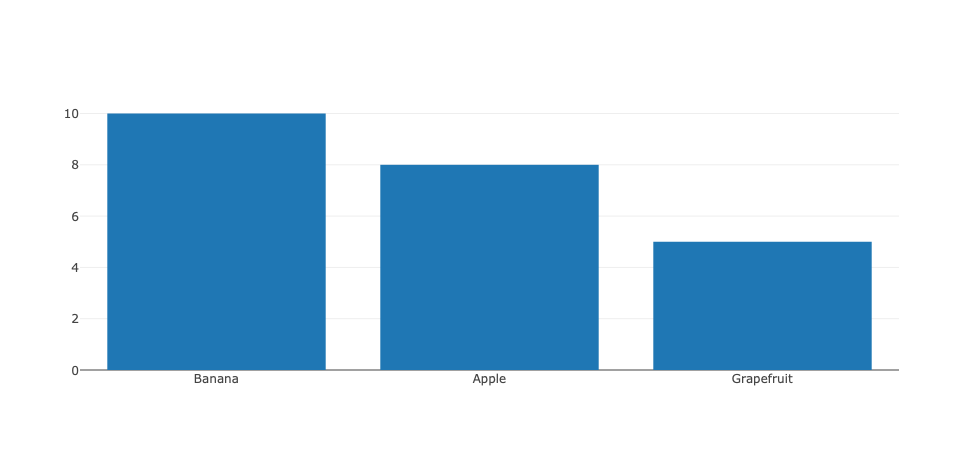

......
......
......

In [9]:
val (x, y) = Seq(
  "Banana" -> 10,
  "Apple" -> 8,
  "Grapefruit" -> 5
).unzip

Bar(x, y).plot()

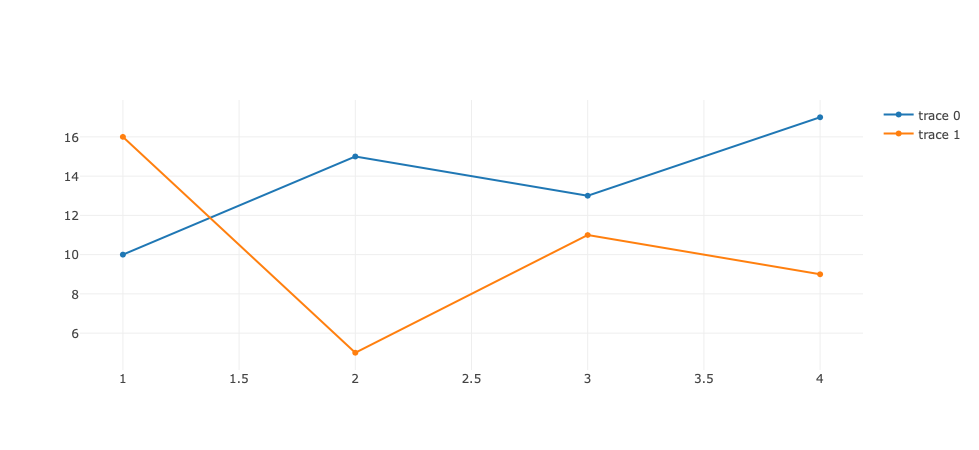

......
......
......
......

In [10]:
val trace1 = Scatter(
  Seq(1, 2, 3, 4),
  Seq(10, 15, 13, 17)
)

val trace2 = Scatter(
  Seq(1, 2, 3, 4),
  Seq(16, 5, 11, 9)
)

val data = Seq(trace1, trace2)

plot(data)